# **Laboratorio 4: Métodos de aproximación**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Santiago Rodríguez Quiroga
2.   David Tobón Molina

**Número del grupo**

Grupo 10


Los métodos de aproximación numéricos permiten modelar diversos escenarios matemáticos y físicos cuyas ecuaciones constitutivas tienen una complejidad tan elevada que no es posible alcanzar una solución analítica. Existe una infinidad de métodos numéricos para aproximar diferentes situaciones. Sin embargo, en este laboratorio se trabaja con la linealización de una función no lineal. La linealización permite resolver sistemas de ecuaciones algebráicas, diferenciales o una combinación de ambas, por lo que tiene una utilidad potencial en la ingeniería. Este proceso está presente en el estudio de sistemas dinámicos, métodos de elementos finitos, diferencias finitas, optimización, machine learning, entre muchas otras más. \

En este sentido, el laboratorio se divide en dos partes, una donde se debe crear un algoritmo de aproximación del gradiente, y otra donde se usa la serie de Taylor multivariable para linealizar alrededor de un punto.

# **Aproximación del gradiente**

Para introducir el algoritmo que se debe usar, hay que recordar un poco la teoría. Sea $f$ una función $f:\mathbb{R}\rightarrow\mathbb{R}$, la derivada de esta función se define como:

\begin{align*}
 \frac{df}{dx} =  \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
\end{align*}

Ahora, si se desea evaluar la derivada de $f$ en un punto concreto $x^*$, queda:

\begin{align*}
\left. \frac{df}{dx} \right|_{x^*}=  \lim_{h\to 0} \frac{f(x^*+h)-f(x^*)}{h}
\end{align*}

El problema es que el computador no puede entender un límite, por lo que hay que hacer una aproximación. Hay que definir un ϵ muy pequeño para modelar la división por cero. Luego, la derivada numérica queda de la forma:

\begin{align*}
 \left.\frac{df}{dx}\right|_{x^*} \approx  \frac{f(x^*+ϵ)-f(x^*)}{ϵ}
\end{align*}

Ahora, si se desea generalizar esta aproximación para el gradiente de una función $f:\mathbb{R^n}→\mathbb{R}$, se debe calcular la derivada parcial con respecto a cada variable. En este sentido, se define $X$ como el vector de variables independientes $X^*=[x_1^*,x_2^*, ..., x_n^*]^T$, luego, el gradiente queda de la forma:

\begin{align*}
  ∇f(X)= \left [\frac{∂f}{∂x_1} , \frac{∂f}{∂x_2}, ..., \frac{∂f}{∂x_n}\right]^T
\end{align*}

Luego, aproximar el gradiente es aproximar $n$ derivadas ordinarias. Ahora, si se quiere encontrar el gradiente en un punto $X^*=[x_1^*,x_2^*, ..., x_n^*]^T$, quedaría:

\begin{align*}
  ∇f(X^*)= \left [  \left. \frac{∂f}{∂x_1} \right|_{X^*}, \left.\frac{∂f}{∂x_2}\right|_{X^*} , ...,  \left.\frac{∂f}{∂x_n} \right|_{X^*}\right]^T
\end{align*}

La idea de este laboratorio es que realice un algoritmo que permita aproximar el gradiente mediante la derivada central alrededor de un punto $X^*$ de una función con un contexto biomédico, la cual es:


- **Aneurisma aórtico:** sa trata de un coágulo en la arteria aorta que obstruye el flujo sanguíneo. Es posible modelar las lineas de corriente de la sangre alrededor del coágulo modelado como un cuerpo de Rankine cilíndrico mediante la función de corriente:

\begin{align*}
  \psi(x,y) = \frac{4}{5}\sqrt{x^2+y^2}\left( 1- \frac{1}{x^2+y^2} \right)\sin \left[\tan^{-1}\left (\frac{y}{x}\right ) \right]
\end{align*}

 Para esto, debe seguir los siguientes pasos:

1. Lea la documentación sobre la libería Sympy en el siguiente enlace: https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html, además, importela.


In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


2. Definir las varibales $x$ y $y$ como variables simbólicas. 

In [2]:
x, y = symbols("x y")

3. Establecer los valores $ϵ=0.001$ y $(x^*,y^*)^T=(\frac{1}{2}, -\frac{1}{2})^T$


In [3]:
epsilon = 0.0001
x1 = 1/2
y1 = -1/2


4. Mediante el uso de la librería Sympy, encuentre las derivadas parciales con respecto a $x$ y $y$ y evalúelas en los puntos mencionados. (**Ayuda:** use la función subs de la librería Sympy)

In [4]:
function = 4/5*(sqrt(x**2+y**2))*(1-1/(x**2+y**2))*(sin(atan(y/x)))
diff_x = diff(function, x)
diff_y = diff(function, y)
sub_x = diff_x.subs([(x,x1),(y,y1)])
sub_y = diff_y.subs([(x,x1),(y,y1)])
print("Derivada respecto a x evaluada en (x*,y*): ", sub_x)
print("Derivada respecto a y evaluada en (x*,y*): ", sub_y)

Derivada respecto a x evaluada en (x*,y*):  -1.60000000000000
Derivada respecto a y evaluada en (x*,y*):  0.800000000000000


5. Mediante la aproximación de la derivada, encuentre las derivadas parciales de la función alrededor de los puntos mencionados.

In [5]:
aproxi_x= (function.subs(x,x1+epsilon)-function.subs(x,x1))/epsilon
aproxi_x_final = aproxi_x.subs(y,y1)
aproxi_y= (function.subs(y,y1+epsilon)-function.subs(y,y1))/epsilon
aproxi_y_final = aproxi_y.subs(x,x1)
print("Aproximación de la derivada respecto a x evaluada en (x*,y*): ", aproxi_x_final)
print("Aproximación de la derivada respecto a y evaluada en (x*,y*): ", aproxi_y_final)


Aproximación de la derivada respecto a x evaluada en (x*,y*):  -1.59984000000168
Aproximación de la derivada respecto a y evaluada en (x*,y*):  0.799839967996832


6. Compare los resultados, ¿cuál es el error porcentual entre la derivada analítica y la numérica?

Recuerde que el error porcentual es de la forma:

\begin{align*}
  Error =  100\frac{|Estimado - Analítico|}{Analítico}
\end{align*}

In [12]:
errorx = (abs((aproxi_x_final-sub_x)/sub_x))*100
errory = (abs((aproxi_y_final-sub_y)/sub_y))*100
print("El error entre la derivada analítica y la numérica de X es", errorx, "%")
print("El error entre la derivada analítica y la numérica de Y es", errory, "%")

El error entre la derivada analítica y la numérica de X es 0.00999999989520494 %
El error entre la derivada analítica y la numérica de Y es 0.0200040003960622 %


# **Linealización de una función**

En esta parte debe usar el algoritmo creado en la parte anterior para linealizar una función no lineal alrededor de un punto en concreto. Para esto, primero que que recordar la teoría de linealización, la cual se lleva a cabo mediante la serie de Taylor truncada:

- **Una dimensión**

\begin{align*}
  f(x) \approx f(x^*) + \left .\frac{df}{dx} \right|_{x^*} (x-x^*)
\end{align*}

- **Multivariable**

\begin{align*}
  f(X) \approx f(X^*) +∇f(X^*)^T (X-X^*)
\end{align*}

  Con $X=[x_1,x_2, ..., x_n]^T$ y $X^*=[x_1^*,x_2^*, ..., x_n^*]^T$

Para esto, debe seguir los siguientes pasos:

1. Defina ahora las variables como arreglos numéricos. Tanto $x$ como $y$ debe variar entre -1 a 1 **(ojo: no incluya el cero en los arreglos o puede producir errores)**

In [29]:
x_t, y_t = np.linspace(-1, 1, 25), np.linspace(-1, 1, 25)

2. Sustituya los valores de los arreglos en las variables (Use *subs* de Sympy)

In [24]:
f_t = function.subs([(x,x1),(y,y1)])
gradiente = [[sub_x], [sub_y]]

3. Con la aproximación de la serie Taylor truncada linealice la función alrededor de los puntos mencionados (use los valores de las derivadas numéricas halladas para las derivadas parciales en la parte anterior)

In [26]:
vector = [x-x1, y-y1]

taylor = (f_t + np.dot(vector, gradiente))[0]
print(taylor)

-1.6*x + 0.8*y + 1.6


4. Grafique la superficie de la función analítica junto a la aproximación lineal. Agregue título, labels y leyendas.

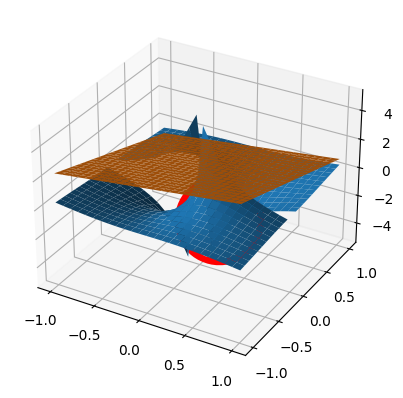

In [47]:
filas = len(x_t)
# n x n: filas = columnas
#matriz_f = [[0]*filas]*filas

matriz_f = np.empty([filas, filas])
matriz_f_lin = np.empty([filas, filas])

for i in range(filas):
    for j in range(filas):
        matriz_f[i][j] = float(function.subs([(x, x_t[i]), (y, y_t[j])]))
        matriz_f_lin[i][j] = float(taylor.subs([(x, x_t[i]), (y, y_t[j])]))
        
mesh_x, mesh_y = np.meshgrid(x_t, y_t)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mesh_x, mesh_y, matriz_f)
ax.plot_surface(mesh_x, mesh_y, matriz_f_lin)
ax.scatter(x1, y1, f_t, color="red", linewidth=60)


# matriz_0s = np.zeros([filas, filas])
# matriz_0s_lin = np.zeros([filas, filas])

# grafica=plt.figure(figsize=(14,10))
# X1, X2 = np.meshgrid(x_t, y_t)
# #hace falta crear el vector para reemplazar acá
# taylor = taylor.subs([(x,X1),(y,X2)])
# ax = grafica.add_subplot(111, projection='3d')
# ax.plot_surface(X1, X2, taylor)
# plt.show()

5. Grafique el error porcentual entre la función analítica y la aproximación lineal de la siguiente forma. Incluya título, labels y leyendas.